### Rock Vs Mine Classification

### Importing dependencies

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# The data contains no header
df = pd.read_csv('sonar_data.csv', header =None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


### Data Cleaning

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [6]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
# Shape of the data
df.shape

(208, 61)

In [9]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

We have almost equal numbers for the labels so the prediction will not be bias

### Splitting to independent and dependent variables

In [10]:
# Separating the features and the target
X = df.drop(columns = 60, axis = 1)
y = df[60]

In [11]:
print(X)
print(y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

### Visualizing the data 

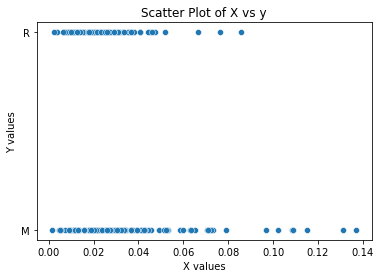

In [55]:
combined_df = pd.concat([X, y], axis=1)

sns.scatterplot(data=combined_df, x=X.columns[0], y=60) 

plt.xlabel('X values')  
plt.ylabel('Y values')
plt.title('Scatter Plot of X vs y')

plt.show()

### Splitting into train and test 

In [12]:
# Stratify was used to make sure there's a balance in the mine and rock distribution
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = 1)

In [13]:
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (187, 60) (21, 60)


In [14]:
print(y.shape, y_train.shape, y_test.shape)

(208,) (187,) (21,)


### Using the Logistic Regression Model

In [15]:
model = LogisticRegression()

In [16]:
model.fit(X_train, y_train)

LogisticRegression()

### Testing the accuracy of the model based on the training data. How well it maps to the expected target

In [17]:
# Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
training_data_accuracy

0.8342245989304813

### Testing the model on data it has not seen

In [18]:
# Accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
test_data_accuracy

0.7619047619047619

### Making a predictive system

Took a random observation of the data to test if the model could adequately predict the target.

In [19]:
input_data = (0.0116,0.0179,0.0449,0.1096,0.1913,0.0924,0.0761,0.1092,0.0757,0.1006,0.25,0.3988,
              0.3809,0.4753,0.6165,0.6464,0.8024,0.9208,0.9832,0.9634,0.8646,0.8325,0.8276,0.8007,
              0.6102,0.4853,0.4355,0.4307,0.4399,0.3833,0.3032,0.3035,0.3197,0.2292,0.2131,0.2347,0.3201,
              0.4455,0.3655,0.2715,0.1747,0.1781,0.2199,0.1056,0.0573,0.0307,0.0237,0.047,0.0102,0.0057,0.0031,
              0.0163,0.0099,0.0084,0.027,0.0277,0.0097,0.0054,0.0148,0.0092)

# Changing the input to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 'R'):
    print('The object is a Rock')
else:
    print('The object is a Mine')

['M']
The object is a Mine


### Classification using SVM 

In [44]:
from sklearn import svm
from sklearn.metrics import accuracy_score,precision_score, confusion_matrix, recall_score, f1_score
clf = svm.SVC()
clf.fit(X_train, y_train)
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)


train_accuracy = accuracy_score(y_train, train_pred)
# Used pos_label as 'M' because I'm more interested in the proper classification of mines
train_precision = precision_score(y_train, train_pred, pos_label ='M')
train_recall_score = recall_score(y_train, train_pred,pos_label ='M')
train_f1_score =  f1_score(y_train, train_pred,pos_label ='M')
train_confusion_matrix = confusion_matrix(y_train, train_pred)


test_accuracy = accuracy_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred,pos_label ='M')
test_recall_score = recall_score(y_test, test_pred,pos_label ='M')
test_f1_score =  f1_score(y_test, test_pred, pos_label ='M')
test_confusion_matrix = confusion_matrix(y_test, test_pred)


### Performance metrics based on the training data

In [46]:
print('Accuracy of the model on train data',train_accuracy)
print('Precision of the model on train data',train_precision)
print('Recall of the model on train data',train_recall_score)
print('F1_score of the model on train data',train_f1_score)
print('Confusion matrix of the model on train data',train_confusion_matrix)

Accuracy of the model on train data 0.8823529411764706
Precision of the model on train data 0.8482142857142857
Recall of the model on train data 0.95
F1_score of the model on train data 0.8962264150943395
Confusion matrix of the model on train data [[95  5]
 [17 70]]


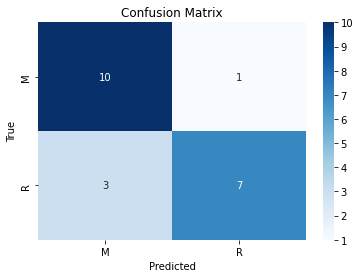

In [51]:
labels = ['M', 'R']
sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels= labels, yticklabels= labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Performance metrics based on the test data

In [52]:
print('Accuracy of the model on train data',test_accuracy)
print('Precision of the model on train data',test_precision)
print('Recall of the model on train data',test_recall_score)
print('F1_score of the model on train data',test_f1_score)
print('Confusion matrix of the model on train data',test_confusion_matrix)

Accuracy of the model on train data 0.8095238095238095
Precision of the model on train data 0.7692307692307693
Recall of the model on train data 0.9090909090909091
F1_score of the model on train data 0.8333333333333333
Confusion matrix of the model on train data [[10  1]
 [ 3  7]]


### Conclusion
SVM does a better job classifying Mines from Rocks than Logistic Regression with SVM having an accuracy score of 80.95% against Logistic Regression's 76.19 when generalizing